In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.stats.proportion as ssp
plt.style.use('rossidata')

/Users/nicholasrossi/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
data=pd.read_csv('data/megaframe.csv')
data['Time of Death'][data['Time of Death']==0]=np.nan
data['Time of Death'][data['Time of Death']==-1]=64
data=data[~np.isnan(data['Time of Death'])]
data['alive']=np.nan

In [228]:
### Killing curve plots

plt.close('all')
fig,ax=plt.subplots()
fig2,ax2=plt.subplots()
strains=data['Strain'].unique()

colorz = cm.tab20(np.linspace(0, 1, len(strains)))
recs=[]

for z,strain in enumerate(strains):
    sliceo=data[data['Strain']==strain]
    maxval=len(sliceo)
    traj=[]
    xvect=np.linspace(0,60*5,61)
    for t in range(61):
        traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)

    ax.plot(xvect,traj,label=strain,color=colorz[z])
    recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colorz[z]))

    
    ind=next(x[0] for x in enumerate(traj) if x[1] < .6)
    start=np.mean(sliceo['Fluor1 mean'])
    end=np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start
    ax2.bar(5-z,np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start-1,color=colorz[z])

#     ax2.scatter(1,5-z,color='black',s=100)
#     ax2.scatter(np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start,5-z,color=colorz[z],s=200)
#     ax2.annotate('',xy=(end,5-z),
#             xytext=(1,5-z), va='center', multialignment='right',
#             arrowprops={'arrowstyle': '->', 'lw': 4, 'ec': 'grey','alpha': 0.25})
ax.legend(recs, strains, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1.6, 1))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('% Cells alive')
fig.savefig('figures/killing_curves.pdf',dpi=300)
#fig2

rpsT cells do not die enough
micF cells do not die enough


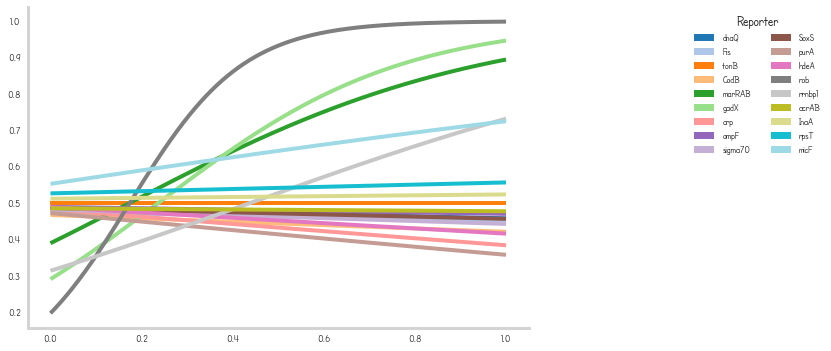

In [130]:
### logistic regression plots
plt.close('all')    
def model(x):
    return 1 / (1 + np.exp(-x))

def information_calculator(px):
    return 1-(-px*np.log2(px)-(1-px)*np.log2(1-px))
recs=[]

fig,ax=plt.subplots()

strains=data['Strain'].unique()
colorz = cm.tab20(np.linspace(0, 1, len(strains)))
values=[]
for z,strain in enumerate(strains):
    sliceo=data[data['Strain']==strain]
    maxval=len(sliceo[~np.isnan(sliceo['Time of Death'])])
    traj=[]

    for t in range(61):
        traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)


    try:
        ind=next(x[0] for x in enumerate(traj) if x[1] < .5)
        data[data['Strain']==strain]['alive']=list(data[data['Strain']==strain]['Time of Death']>=ind)

    except:
        print(strain+' cells do not die enough')
        ind=61
        data[data['Strain']==strain]['alive']=list(data[data['Strain']==strain]['Time of Death']>=ind)

    
    clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')


    dead=sliceo[sliceo['Time of Death']<=ind]['Fluor1 mean'].values
    alive=sliceo[sliceo['Time of Death']>ind]['Fluor1 mean'].values

    data_tot=np.concatenate((dead, alive))
    clf.fit(data_tot.reshape(-1, 1) , np.concatenate((np.zeros(len(dead)), np.ones(len(alive)))).reshape(-1, 1) )
    X_test=np.linspace(min(data_tot),max(data_tot),1000)

    loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot((X_test-min(data_tot))/(max(data_tot)-min(data_tot)), loss, color=colorz[z])
    recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colorz[z]))



barfig.savefig('figures/information_bar.pdf',dpi=300)


ax.legend(recs, strains, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1.6, 1))

fig.savefig('figures/logistic.pdf',dpi=300)
fig

In [129]:
recs

[]

In [159]:
#Information over time and barchart
plt.close('all')    
def model(x):
    return 1 / (1 + np.exp(-x))

def information_calculator(px):
    vals=1-(-px*np.log2(px)-(1-px)*np.log2(1-px))
    vals[np.isnan(vals)]=1
    return vals

def entropy_calculator(px):
    vals=(-px*np.log2(px)-(1-px)*np.log2(1-px))
    vals[np.isnan(vals)]=0
    return vals

barfig,barax=plt.subplots()
fig,ax=plt.subplots(figsize=(6,10))
barfig,barax=plt.subplots()
strains=data['Strain'].unique()
colorz = cm.tab20(np.linspace(0, 1, len(strains)))
values=[]
#strainz=['crp','sodA']

#strainz=ciprodata['Strain'].unique()
strainz=strains
recs=[]
for z,strain in enumerate(strainz):
    sliceo=data[data['Strain']==strain]
    sliceo=sliceo[~np.isnan(sliceo['Time of Death'])]
    maxval=len(sliceo)
    traj=[]

    for t in range(61):
        traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)
    InitialAu=sliceo['Fluor1 mean']
    Deathtime=sliceo['Time of Death']

    d = {'InitialAu': InitialAu, 'DeathTime': Deathtime}
    df = pd.DataFrame(data=d)

    df=df.dropna()
    s={'fluor':df['InitialAu'],'death':df['DeathTime']}
    sd=pd.DataFrame(s)
    sd=sd.sort_values(by='fluor')
    n_splits=10
    rez=np.array_split(sd, n_splits)
    column_num=20
    bins=np.arange(column_num)
    grid=np.zeros((n_splits,column_num-1))
    labels=np.zeros((n_splits,column_num-1))
    mins=[]

    for x in range(n_splits):
        grid[x,:]=np.cumsum(np.histogram(rez[x].death, bins=bins)[0]/len(rez[x].death))
    
    value_traj=(np.nanmean(information_calculator(grid),0)-information_calculator(np.asarray(traj)))
    
    vanilla_traj=np.nanmean(information_calculator(grid),0)[:-1]
    recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colorz[z]))


    ax.plot(np.arange(column_num-2)*5,(np.nanmean(information_calculator(grid),0)-information_calculator(np.asarray(traj)))[:-1],color=colorz[z],label=strain)
    means=value_traj[:-1]
    
    errors=[np.asarray(list(ssp.proportion_confint(int(x*len(InitialAu)), len(InitialAu), alpha=0.1, method='wilson'))) for x in traj ]
    error_down=[information_calculator(x)[0] for x in errors]
    error_up=[information_calculator(x)[1] for x in errors]
    
    

    #ax.fill_between(np.arange(column_num-2)*5,  vanilla_traj-error_down[:-1], vanilla_traj-error_up[:-1], color=colorz[z], alpha=0.5)
    
    try:
        ind=next(x[0] for x in enumerate(traj) if x[1] < .5)
        
    except:
        print(strain+' cells do not die enough')
        ind=60
        
    values.append(max(value_traj))

d = {'values': values, 'strains': strainz}
bardf = pd.DataFrame(data=d)
bardf.sort_values('values', ascending=False).plot.bar(x='strains',ax=barax,color='#e684ae')
barax.set_ylabel('Information (bits)')



#ax.legend()
#ax.set_ylim([0,0.12])
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Information (bits)')
barfig.savefig('figures/bar.pdf')
ax.legend(recs, strainz, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1, 1))

fig.savefig('figures/information_overtime.pdf')

barfig.savefig('figures/bar.pdf')



ValueError: operands could not be broadcast together with shapes (19,) (61,) 

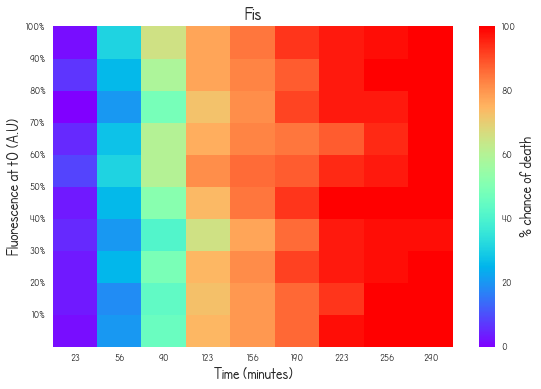

In [157]:
fig

In [52]:
#[entropy_calculator(x)[0] for x in errors]
plt.close('all')
fig,ax=plt.subplots()

#errors=[np.asarray(list(ssp.proportion_confint(int(x*len(InitialAu)), len(InitialAu), alpha=0.05, method='normal'))) for x in traj ]

error_down=np.asarray([x[0] for x in errors])
error_up=np.asarray([x[1] for x in errors])
trajo=np.asarray(traj)
ax.plot(np.arange(len(trajo))*5,trajo)

ax.fill_between(np.arange(len(trajo))*5,  error_down, error_up, color=colorz[z], alpha=0.5)

fig.savefig('figures/robkilling.pdf')


In [ ]:
entropy_calculator(error_down)

In [3]:

#### Distribution animations
plt.close('all')
fig,ax=plt.subplots()
sliceo=data[data['Strain']=='rob']

traj=[]
xvect=np.linspace(0,60*5,61)
for t in range(61):
    traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)

ind=next(x[0] for x in enumerate(traj) if x[1] < 0.1)
        
datum=sliceo['Fluor1 mean']
datum2=sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind]
# probs, bons = np.histogram(sliceo['Fluor1 mean'], normed='True', bins=bins)
# ax.plot(bons[1:], np.cumsum(probs / np.sum(probs)),  drawstyle='steps-pre')
# probs, bons = np.histogram(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind], normed='True', bins=bins)
# ax.plot(bons[1:], np.cumsum(probs / np.sum|(probs)),  drawstyle='steps-pre')
# fig


density = gaussian_kde(datum)
xs = np.linspace(500,16000,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
ax.plot(xs,density(xs))

density = gaussian_kde(datum2)
density.covariance_factor = lambda : .25
density._compute_covariance()
ax.plot(xs,density(xs))

ax.set_xscale('log')
fig

NameError: name 'maxval' is not defined

In [62]:
### animation of distribution
plt.close('all')
fig_animate,ax=plt.subplots()

lines=[]
sliceos=[data[data['Strain']=='rob'],data[data['Strain']=='purA']]
colors=['#e684ae','teal']
for n,l in enumerate(sliceos):
    lines.append(ax.plot([],[],color=colors[n]))
xs = np.linspace(500,16000,200)
ax.set_xlim([500,16000])
ax.set_xscale('log')
ax.set_ylim([0,.0006])
def animate(z):
    for j,sliceo in enumerate(sliceos):
        density = gaussian_kde(sliceo['Fluor1 mean'][sliceo['Time of Death']>=z])
        density.covariance_factor = lambda : .25
        density._compute_covariance()
        ax.plot(xs,density(xs),color='grey',alpha=0.05)

        lines[j][0].set_data(xs,density(xs))

    return lines

anim3 = animation.FuncAnimation(fig_animate, animate,frames=61,  blit=False)
plt.tight_layout()
anim3.save('evolution.mp4', writer='ffmpeg',bitrate=1800)
#HTML(anim3.to_html5_video())

In [156]:
#heatmaps

#dataload
strains=data['Strain'].unique()
plt.close('all')
megafig,megax=plt.subplots(4,5,figsize=(5*3,4*3),sharex=True,sharey=True)
for u,strain in enumerate(list(sorto['strains'].values)):
    
    sliceo=data[data['Strain']==strain]



    InitialAu=sliceo['Fluor1 mean']
    Deathtime=sliceo['Time of Death']

    d = {'InitialAu': InitialAu, 'DeathTime': Deathtime}
    df = pd.DataFrame(data=d)
    df['DeathTime'][df['DeathTime']==-1]=62
    df['DeathTime'][df['DeathTime']==0]=np.nan

    fig,ax=plt.subplots()
    df=df.dropna()
    s={'fluor':df['InitialAu'],'death':5*df['DeathTime']}
    sd=pd.DataFrame(s)
    sd=sd.sort_values(by='fluor')
    n_splits=10
    rez=np.array_split(sd, n_splits)
    column_num=10
    bins=np.linspace(0,300,column_num)-10
    grid=np.zeros((n_splits,column_num-1))
    labels=np.zeros((n_splits,column_num-1))
    mins=[]
    
    for x in range(n_splits):
        mino,maxo=min(rez[x].fluor),max(rez[x].fluor)
        grid[x,:]=np.cumsum(np.histogram(rez[x].death, bins=bins)[0]/len(rez[x].death))
        labels[x,:]=np.histogram(rez[x].death, bins=bins)[0]
        mins.append(str((x+1)*10)+'%')

    sns.heatmap(np.flipud(grid)*100,yticklabels=np.flipud(mins),xticklabels=[int(u) for u in bins[1:]],cmap="rainbow",ax=ax,vmin=0, vmax=100,cbar_kws={'label': '% chance of death'})
    sns.heatmap(np.flipud(grid)*100,yticklabels=np.flipud(mins),xticklabels=[int(u) for u in bins[1:]],cmap="rainbow",ax=megax[int(np.floor(u/5)),u%5],cbar=False,vmin=0, vmax=100)
    megax[int(np.floor(u/5)),u%5].axis('off')
    megax[int(np.floor(u/5)),u%5].set_title(strain)
    ax.set_yticks(np.arange(len(np.flipud(mins)))+1)
    plt.yticks(rotation=0) 

    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Fluorescence at t0 (A.U)')

    ax.set_title(strain)
    
    fig.savefig('figures/'+strain+'_heatmap.pdf',dpi=300)
megafig.savefig('figures/megaheatmap.pdf',dpi=300)

In [155]:
sorto=bardf.sort_values('values', ascending=False)
list(sorto['strains'].values)

['purA',
 'InaA',
 'rob',
 'gadX',
 'lacuv5',
 'micF',
 'hdeA',
 'crp',
 'tonB',
 'SoxS',
 'rrnbp1',
 'acrAB',
 'sigma70',
 'sodA',
 'marRAB',
 'CodB',
 'ompF',
 'rpsT',
 'dnaQ',
 'Fis']

In [36]:

ciprodata=pd.read_csv('data/ciproframe.csv')
strains=ciprodata['Strain'].unique()
# ciprodata['DeathTime'][ciprodata['DeathTime']==-1]=62
# ciprodata['DeathTime'][ciprodata['DeathTime']==0]=62

In [37]:
for strain in strains:
    plt.close('all')
    sliceo=ciprodata[ciprodata['Strain']==strain]



    InitialAu=sliceo['Fluor1 mean']
    Deathtime=sliceo['Time of Death']

    d = {'InitialAu': InitialAu, 'DeathTime': Deathtime}
    df = pd.DataFrame(data=d)
    df['DeathTime'][df['DeathTime']==-1]=62
    df['DeathTime'][df['DeathTime']==0]=62

    fig,ax=plt.subplots()
    df=df.dropna()
    s={'fluor':df['InitialAu'],'death':5*df['DeathTime']}
    sd=pd.DataFrame(s)
    sd=sd.sort_values(by='fluor')
    n_splits=10
    rez=np.array_split(sd, n_splits)
    column_num=10
    bins=np.linspace(0,300,column_num)-10
    grid=np.zeros((n_splits,column_num-1))
    labels=np.zeros((n_splits,column_num-1))
    mins=[]
    
    for x in range(n_splits):
        mino,maxo=min(rez[x].fluor),max(rez[x].fluor)
        grid[x,:]=np.cumsum(np.histogram(rez[x].death, bins=bins)[0]/len(rez[x].death))
        labels[x,:]=np.histogram(rez[x].death, bins=bins)[0]
        mins.append(str((x+1)*10)+'%')

    sns.heatmap(np.flipud(grid)*100,yticklabels=np.flipud(mins),xticklabels=[int(u) for u in bins[1:]],cmap="rainbow",vmin=0, vmax=100,cbar_kws={'label': '% chance of death'})
    ax.set_yticks(np.arange(len(np.flipud(mins)))+1)
    plt.yticks(rotation=0) 

    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Fluorescence at t0 (A.U)')
    ax.set_title(strain)
    fig.savefig('figures/cipro_figs/'+strain+'_ciproheatmap.pdf',dpi=300)

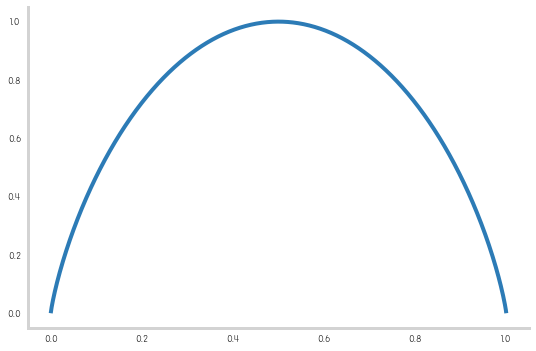

In [102]:
plt.close('all')
fig,ax=plt.subplots()
xvals=np.linspace(0,1,1000)
ax.plot(xvals,1-information_calculator(xvals))
fig

In [49]:
#Cipro analysis
barfig,barax=plt.subplots()
fig,ax=plt.subplots(figsize=(6,10))
megafig,megax=plt.subplots()
barfig,barax=plt.subplots()
strains=ciprodata['Strain'].unique()

megafig,megax=plt.subplots(4,5,figsize=(5*3,4*3),sharex=True,sharey=True)

colorz = cm.tab20(np.linspace(0, 1, len(strains)))
cipvalues=[]
#strainz=['gadX']

#strainz=['marrab','rob','gadX']
strainz=strains
recs=[]
for z,strain in enumerate(strainz):
    singlfig,singleax=plt.subplots()
    sliceo=ciprodata[ciprodata['Strain']==strain]
    sliceo=sliceo[~np.isnan(sliceo['Time of Death'])]
    sliceo['Time of Death'][sliceo['Time of Death']==-1]=62
    sliceo['Time of Death'][sliceo['Time of Death']==0]=62
    maxval=len(sliceo)
    traj=[]

    for t in range(61):
        traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)
    InitialAu=sliceo['Fluor1 mean']
    Deathtime=sliceo['Time of Death']

    d = {'InitialAu': InitialAu, 'DeathTime': Deathtime}
    df = pd.DataFrame(data=d)

    df=df.dropna()
    s={'fluor':df['InitialAu'],'death':5*df['DeathTime']}
    sd=pd.DataFrame(s)
    sd=sd.sort_values(by='fluor')
    n_splits=10
    rez=np.array_split(sd, n_splits)
    column_num=61
    bins=np.linspace(0,300,column_num)-1

    grid=np.zeros((n_splits,column_num-1))
    labels=np.zeros((n_splits,column_num-1))
    mins=[]

    for x in range(n_splits):
        mino,maxo=min(rez[x].fluor),max(rez[x].fluor)
        grid[x,:]=np.cumsum(np.histogram(rez[x].death, bins=bins)[0]/len(rez[x].death))
        labels[x,:]=np.histogram(rez[x].death, bins=bins)[0]
        mins.append(str((x+1)*10)+'%')

    sns.heatmap(np.flipud(grid)*100,ax=singlax,yticklabels=np.flipud(mins),xticklabels=[int(u) for u in bins[1:]],cmap="rainbow",vmin=0, vmax=100,cbar_kws={'label': '% chance of death'})
    singleax.set_title(strain)
    singleax.set_yticks(np.arange(len(np.flipud(mins)))+1)
    singlefig.savefig('figures/cipro_figs/'+strain+'_ciproheatmap.pdf',dpi=300)
    sns.heatmap(np.flipud(grid)*100,cmap="rainbow",ax=megax[int(np.floor(z/5)),z%5],cbar=False,vmin=0, vmax=100)
    megax[int(np.floor(z/5)),z%5].axis('off')
    megax[int(np.floor(z/5)),z%5].set_title(strain)
    
    recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colorz[z]))
    information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))


    ax.plot(np.arange(len(information_time))*5,information_time,color=colorz[z],label=strain)


    
    

    #ax.fill_between(np.arange(column_num-2)*5,  vanilla_traj-error_down[:-1], vanilla_traj-error_up[:-1], color=colorz[z], alpha=0.5)
    

        
    cipvalues.append(np.max(information_time))

d = {'carbvalues': values,'cipvalues': cipvalues, 'strains': strainz}
bardf = pd.DataFrame(data=d)
bardf.sort_values('cipvalues', ascending=False).plot.bar(x='strains',ax=barax)
barax.set_ylabel('Information (bits)')



#ax.legend()
#ax.set_ylim([0,0.12])
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Information (bits)')
barfig.savefig('figures/cipro_figs/bar.pdf')
ax.legend(recs, strainz, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1, 1))

fig.savefig('figures/cipro_figs/information_overtime.pdf')
megafig.savefig('figures/cipro_figs/megafig.pdf')
barfig.savefig('figures/cipro_figs/bar.pdf')


In [116]:
strains

array(['dnaQ', 'Fis', 'tonB', 'CodB', 'marRAB', 'gadX', 'crp', 'ompF',
       'sigma70', 'SoxS', 'purA', 'hdeA', 'rob', 'rrnbp1', 'acrAB', 'InaA',
       'rpsT', 'micF', 'lacuv5', 'sodA'], dtype=object)

In [38]:
#### Hyper synthsis Heat, bar, mega

#clear all charts:
plt.close('all')  

#information and entropy calculators
def information_calculator(px):
    vals=1-(-px*np.log2(px)-(1-px)*np.log2(1-px))
    vals[np.isnan(vals)]=1
    return vals

def entropy_calculator(px):
    vals=(-px*np.log2(px)-(1-px)*np.log2(1-px))
    vals[np.isnan(vals)]=0
    return vals

#initialize figures
barfig,barax=plt.subplots()
fig,ax=plt.subplots(3,1,figsize=(4,12),sharex=True,sharey=True)
megafig,megax=plt.subplots(4,5,figsize=(5*3,4*3),sharex=True,sharey=True)
killingcurve,killingax=plt.subplots()
gadxkilling, gadxkillingax=plt.subplots()
#indicate strains and colors
#strainz=data['Strain'].unique()
strainz=['purA',
 'InaA',
 'rob',
 'gadX',
 'lacuv5',
 'hdeA',
 'crp',
 'tonB',
 'SoxS',
 'rrnbp1',
 'acrAB',
 'sigma70',
 'sodA',
 'CodB',
 'ompF',
 'dnaQ',
 'Fis']
strainz=ciprodata['Strain'].unique()
colorz = cm.tab20(np.linspace(0, 1, len(strainz)))
values=[]
recs=[]
for z,strain in enumerate(strainz):
    singlefig,singlheat=plt.subplots()

    #slice the data
    sliceo=data[data['Strain']==strain]
    #remove any nans
    sliceo=sliceo[~np.isnan(sliceo['Time of Death'])]
    
    #calculate the total number of cells
    cell_tot=len(sliceo)
    
    #compute the cell death over time
    celldeath=[]
    killing_matrix=np.zeros((5,61))

    arrays=np.array_split(sliceo, 5)
    for l,ara in enumerate(arrays):
        for t in range(61):
            cell_tot=len(ara)
            killing_matrix[l,t]=(cell_tot-len(ara[ara['Time of Death']<=t]))/cell_tot
    meano=np.mean(killing_matrix,0)
    stdo=np.std(killing_matrix,0)

    killingax.plot(np.arange(61)*5,meano, color=colorz[z])
    
    killingax.fill_between(np.arange(61)*5,  meano-stdo, meano+stdo, color=colorz[z], alpha=0.5)
    if strain =='gadX':
        gadxkillingax.plot(np.arange(61)*5,meano, color=colorz[z])
        gadxkillingax.fill_between(np.arange(61)*5,  meano-stdo, meano+stdo, color=colorz[z], alpha=0.5)

    #compute the information over time as a function of initial fluorescence
    InitialAu=sliceo['Fluor1 mean']
    Deathtime=sliceo['Time of Death']
    d = {'InitialAu': InitialAu, 'DeathTime': Deathtime}
    df = pd.DataFrame(data=d)
    df=df.dropna()
    s={'fluor':df['InitialAu'],'death':5*df['DeathTime']}
    sd=pd.DataFrame(s)
    sd=sd.sort_values(by='fluor')
    
    #number of fluorophore splits
    n_splits=10
    rez=np.array_split(sd, n_splits)
    
    #number of time columns
    column_num=61
    bins=np.linspace(0,300,column_num)-1
    grid=np.zeros((n_splits,column_num-1))
    labels=np.zeros((n_splits,column_num-1))
    mins=[]

    
    for x in range(n_splits):
        mino,maxo=min(rez[x].fluor),max(rez[x].fluor)
        labels[x,:]=np.histogram(rez[x].death, bins=bins)[0]
        mins.append(str((x+1)*10)+'%')
        grid[x,:]=np.cumsum(np.histogram(rez[x].death, bins=bins)[0]/len(rez[x].death))
    
    sns.heatmap(np.flipud(grid)*100,yticklabels=np.flipud(mins),ax=singlheat,xticklabels=[int(u) for u in bins[1:]],cmap="rainbow",vmin=0, vmax=100,cbar_kws={'label': '% chance of death'})
    
    sns.heatmap(np.flipud(grid)*100,cmap="gnuplot",ax=megax[int(np.floor(z/5)),z%5],cbar=False,vmin=0, vmax=100)
    megax[int(np.floor(z/5)),z%5].axis('off')
    megax[int(np.floor(z/5)),z%5].set_title(strain)
    singlefig.savefig('figures/heatmaps/'+strain+'_heatmap.pdf',dpi=300)

    #compute the information over time from the heatmaps
    information_time=np.nanmean(information_calculator(grid),0)-information_calculator(np.mean(grid,0))

    

    #add rectangle for color match and plot the information over time
    recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colorz[z]))
    if strain in ['purA','InaA','rob','gadX']:
        ax[0].plot(np.arange(len(information_time))*5,information_time,color=colorz[z],label=strain)
    elif strain in ['lacuv5','hdeA','crp','tonB']:
        ax[1].plot(np.arange(len(information_time))*5,information_time,color=colorz[z],label=strain)
    else:
        ax[2].plot(np.arange(len(information_time))*5,information_time,color=colorz[z],label=strain)
    # log the maximum information value of the trajectory for comparison among strains
    values.append(np.max(information_time))

    
# plot the bargraph of information rankings
d = {'values': values, 'strains': strainz}
bardf = pd.DataFrame(data=d)
bardf.sort_values('values', ascending=False).plot.bar(x='strains',ax=barax,color='#e684ae')
barax.set_ylabel('Information (bits)')

#axis for killing curves
killingax.set_xlabel('Time (minutes)')
killingax.set_ylabel('Percentage of Cells Alive')
killingax.legend(recs, strainz, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1.5, 1))

gadxkillingax.set_xlabel('Time (minutes)')
gadxkillingax.set_ylabel('Percentage of Cells Alive')

#ax.legend()
#ax.set_ylim([0,0.12])
for o in range(3):
    ax[o].set_xlabel('Time (minutes)')
    ax[o].set_ylabel('Information (bits)')
barfig.savefig('figures/bar.pdf')
ax[2].legend(recs, strainz, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1, 1))


fig.savefig('figures/information_overtime.pdf')

barfig.savefig('figures/bar.pdf')
killingcurve.savefig('figures/kilingcurve.pdf')
gadxkilling.savefig('figures/gadxkilling.pdf')
megafig.savefig('figures/megaplot_cm3.png',dpi=300)

In [22]:
data['Strains']

KeyError: 'Strains'

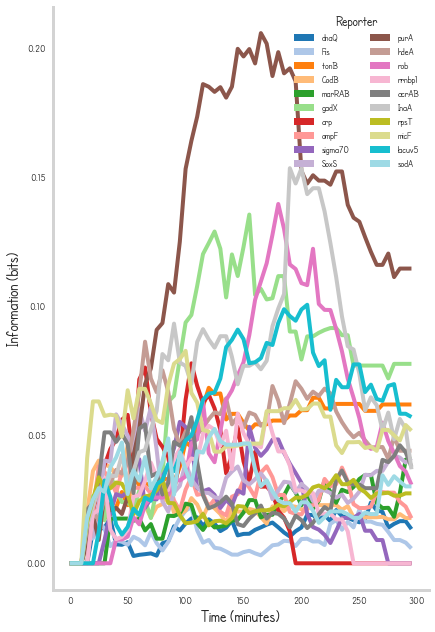

In [235]:
fig

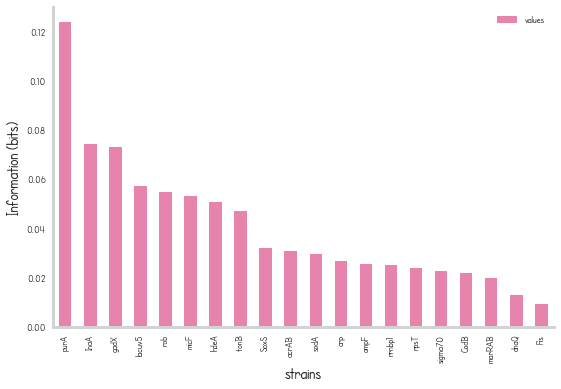

In [232]:
barfig